### 초기설정

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd

df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [7]:
df_cluster1_2024 = pd.read_csv('/content/cluster1.csv')

/tmp/ipython-input-7-1745951750.py:1: DtypeWarning: Columns (24,25,27,28,29,30,50,60,61,65,66,68,76,81,117,118,119,125,126,127,134,227,228,229,233,236,240,241,247,277,283) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cluster1_2024 = pd.read_csv('/content/cluster1.csv')


In [3]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2022~2024

In [4]:
# 1. 활동명 매핑
q4a_mapping_2022 = {
    "Q4A01": "식도락 관광", "Q4A02": "쇼핑", "Q4A03": "자연경관 감상", "Q4A04": "고궁/역사 유적지 방문",
    "Q4A05": "전통문화체험", "Q4A06": "박물관, 전시관 관람", "Q4A07": "K-POP/한류스타 공연장 방문",
    "Q4A08": "드라마/영화 촬영지 방문", "Q4A09": "연극, 뮤지컬, 발레 등 공연 관람", "Q4A10": "지역 축제 참여",
    "Q4A11": "유흥/오락", "Q4A12": "뷰티/의료관광", "Q4A13": "스포츠/레포츠 및 비즈니스 활동",
    "Q4A14": "업무수행", "Q4A15": "연수/교육/연구", "Q4A16": "시찰(산업시설 등)", "Q4A17": "기타"
}

q4b_code_mapping_2022 = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관, 전시관 관람", 7: "K-POP/한류스타 공연장 방문",
    8: "드라마/영화 촬영지 방문", 9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥/오락", 12: "뷰티/의료관광", 13: "스포츠/레포츠 및 비즈니스 활동",
    14: "업무수행", 15: "연수/교육/연구", 16: "시찰(산업시설 등)", 17: "기타"
}

q4a_cols = list(q4a_mapping_2022.keys())
q4b_cols = ["Q4B1", "Q4B2", "Q4B3"]

# 2. 주요활동 추출 함수
def get_q4a_activities(row):
    return [q4a_mapping_2022[col] for col in q4a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q4b_satisfaction(row):
    return [q4b_code_mapping_2022.get(int(row[col]), f"코드 {row[col]}")
            for col in q4b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2022가 정의된 상태에서만)
df_2022["주요활동"] = df_2022.apply(get_q4a_activities, axis=1)
df_2022["만족활동"] = df_2022.apply(get_q4b_satisfaction, axis=1)


In [5]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [6]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


## 클러스터 1 타깃

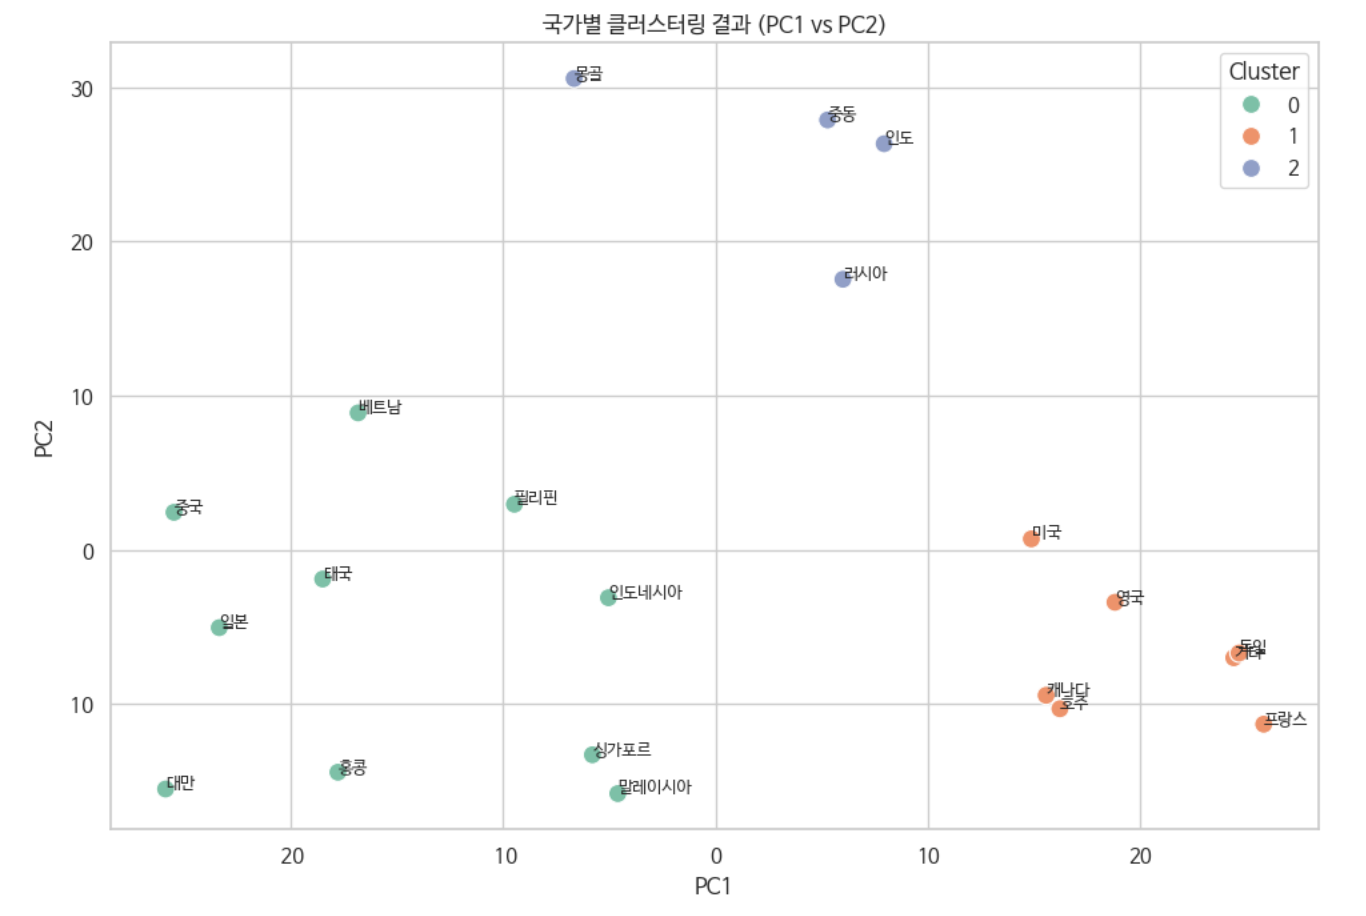

| 순위 | 주요 변수명              | 의미                    |
| -- | ------------------- | --------------------- |
| 1  | `박물관·전시관 관람`        | 문화예술 관심도 매우 높음        |
| 2  | `숙박비 1인당 500달러 초과`  | 고급 숙박 선호 (하이엔드 여행자)   |
| 3  | `여행사 이용 비율`         | 자유여행만이 아닌 기획여행도 수용    |
| 4  | `데이터 사용량 적음`        | 단기 체류 or 현지 사용 빈도 낮음? |
| 5  | `한국철도 1인당 100달러 초과` | 교통비용 지출 큼 → 광역 이동 가능성 |

문화 중심 + 고급 소비 성향 + 기획 여행 혼합형 + 광역 이동형

--------------------

* 주요변수의 기여도는 비슷해서 해본 비교!

| 비교 항목     | 클러스터 0            | 클러스터 1              |
| --------- | ----------------- | ------------------- |
| 소비 수준     | 중간                | **높음 (Top)**        |
| 여행 형태     | 근거리 + 반복          | **장거리 + 기획/자유 혼합**  |
| 활동 성향     | 문화 활동 일부 포함       | **문화 활동 중심**        |
| 여행 만족도    | 평균 이하             | **전반적으로 높음**        |
| 전략 대상 적합도 | 이미 인프라 구축 → 유지 전략 | **재방문 전환 유도 핵심 타겟** |


## 클러스터1 2024년 데이터 분석(선우)

In [8]:
df_cluster1_2024.head()

,Unnamed: 0,pnid,MVIT,RVIT,XRVIT,TYP,Q1,Q1_1a1,Q1_1a2,Q1_1a3,...,D_NUM,D_GUB,weight1,weight2,weight3,weight4,weight,cluster,재방문자,재방문의향긍정
0,9,69,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문","한국에서 행사(가족행사, 스포츠 행사 등)가 있어서",NaN,NaN,...,1 회,개 별 여 행,1005.032741,NaN,NaN,NaN,1005.032741,1,False,False
1,19,85,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행",사업 또는 전문 활동,NaN,NaN,NaN,...,1 회,개 별 여 행,1210.286770,NaN,NaN,NaN,1210.286770,1,False,False
2,28,101,3,3회,재방문,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",과거 방문 경험이 좋아서,"한류 콘텐츠(K-pop, 드라마, 영화 등)를 접하고 나서",계획한 여행 경비에 적합한 여행지여서,...,3 회,개 별 여 행,554.457606,NaN,NaN,NaN,554.457606,1,True,False
3,31,104,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","교육(어학 프로그램, 연수 등)",NaN,NaN,NaN,...,1 회,개 별 여 행,99.583958,NaN,NaN,NaN,99.583958,1,False,False
4,33,107,1,1회,NaN,"개별여행 : 일정, 숙박 등 여행의 모든 준비를 직접 수행","친구, 친지 방문",새로운 국가에 가고 싶어서,계획한 여행 경비에 적합한 여행지여서,NaN,...,1 회,개 별 여 행,550.525754,NaN,NaN,NaN,550.525754,1,False,False


In [12]:
df_cluster1_2024.shape

(4158, 406)

In [14]:
df_cluster1_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4158 entries, 0 to 4157
Columns: 406 entries, Unnamed: 0 to 재방문의향긍정
dtypes: bool(2), float64(138), int64(21), object(245)
memory usage: 12.8+ MB


### **1. 숙박비 기준으로 고소비층 분석**

| 기준 항목         | 숙박비 기준 고소비 (C숙박비1인대체)                                         | 총액 기준 고소비 (총액1인TOT2, 상위 25%)                                |
| ------------- | ------------------------------------------------------------- | ----------------------------------------------------------- |
| **정의 방식**     | 숙박비가 200\~500달러 또는 500달러 초과 구간에 해당                            | 총지출금액이 전체 상위 25% 이상에 해당                                     |
| **강점**        | - 숙소 수준 = 체류 질의 직접 지표<br>- 장기 체류 가능성<br>- 고급 관광 서비스와 직접 연계 가능 | - 전체 소비력 반영<br>- 모든 항목(쇼핑, 숙박, 음식 등)의 종합력<br>- 예산기반 타겟팅에 유용 |
| **약점**        | - 숙박 이외 지출은 반영되지 않음<br>- 짧은 체류 + 고급 숙소일 경우 과대평가 가능            | - 거리·항공료·환율 등에 따라 왜곡 가능<br>- 세부 행동 맥락이 드러나지 않음              |
| **클러스터1 연관성** | ✅ PCA 결과에서 핵심 기여 변수 (강한 특징성)                                  | 🔶 보조지표로 의미 있지만 클러스터 정의의 핵심 변수는 아님                          |
| **활용 적합 사례**  | 고급 관광 서비스 설계 (호텔, 리조트, K-웰니스, 프리미엄 투어 등)                      | 고지출 관광객 우선 혜택 정책 (재방문 쿠폰, 소비 리워드 등)                         |
| **데이터 안정성**   | 코드북 기준 구간 명확, 단순하고 누락 적음                                      | 실수치 기반이므로 결측·이상치 주의 필요                                      |

>클러스터 1은 '숙박비'가 핵심 소비 성향이자 고부가가치의 지표였기 때문에,
>우선은 숙박비 기준으로 고소비층을 정의하는 것이 전략적으로 더 타당하다.

>이후 필요 시, 총액 기준을 보조 지표로 활용하여
▶ 고소비+고숙박 교차 집단 = 핵심 타겟으로 설정할 수 있다.



In [19]:
df_cluster1_2024['C숙박비1인대체'].unique()

array(['50$ 이하', '500$ 초과', '200$ 초과 ~ 500$ 이하', '50$ 초과~ 100$ 이하',
       '100$ 초과 ~ 200$ 이하', nan], dtype=object)

In [21]:
# 고소비층 기준: 200달러 초과 ~ 500달러 이하, 또는 500달러 초과
high_spenders = df_cluster1_2024[df_cluster1_2024['C숙박비1인대체'].isin(['200$ 초과 ~ 500$ 이하', '500$ 초과'])]

# 저소비층 기준: 나머지 구간
low_spenders = df_cluster1_2024[df_cluster1_2024['C숙박비1인대체'].isin(['50$ 이하', '50$ 초과~ 100$ 이하', '100$ 초과 ~ 200$ 이하'])]

#### 1-1. 재방문의향 비교 (Q13)

In [22]:
# 전체 분포
df_cluster1_2024['Q13'].value_counts(normalize=True)

# 고소비 vs 저소비자 비교
print("고소비층 재방문의향 분포:")
print(high_spenders['Q13'].value_counts(normalize=True))

print("\n저소비층 재방문의향 분포:")
print(low_spenders['Q13'].value_counts(normalize=True))

고소비층 재방문의향 분포:
Q13
⑤ 매우 그렇다       0.602576
④ 대체로 그렇다      0.272922
③ 보통           0.094756
② 별로 그렇지 않다    0.024532
① 전혀 그렇지 않다    0.005213
Name: proportion, dtype: float64

저소비층 재방문의향 분포:
Q13
⑤ 매우 그렇다       0.716556
④ 대체로 그렇다      0.196026
③ 보통           0.063576
② 별로 그렇지 않다    0.019868
① 전혀 그렇지 않다    0.003974
Name: proportion, dtype: float64


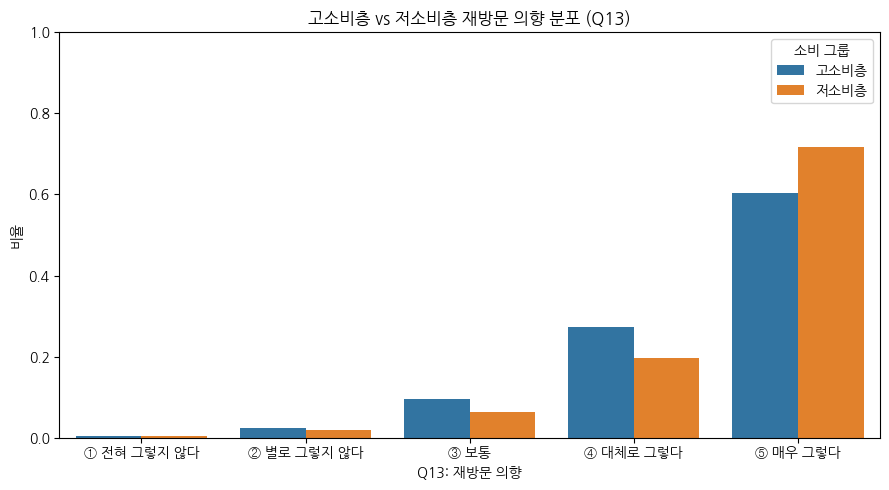

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 명시적 순서 지정
revisit_order = ['① 전혀 그렇지 않다', '② 별로 그렇지 않다', '③ 보통', '④ 대체로 그렇다', '⑤ 매우 그렇다']

# 비율 계산 및 정렬
high_counts = high_spenders['Q13'].value_counts(normalize=True).reindex(revisit_order).fillna(0)
low_counts = low_spenders['Q13'].value_counts(normalize=True).reindex(revisit_order).fillna(0)

# 시각화용 데이터프레임 생성
plot_df = pd.DataFrame({
    '재방문 의향': revisit_order,
    '고소비층': high_counts.values,
    '저소비층': low_counts.values
})

# Melt for seaborn
plot_df_melted = plot_df.melt(id_vars='재방문 의향', var_name='소비 그룹', value_name='비율')

# 그래프 그리기
plt.figure(figsize=(9, 5))
sns.barplot(data=plot_df_melted, x='재방문 의향', y='비율', hue='소비 그룹')
plt.title('고소비층 vs 저소비층 재방문 의향 분포 (Q13)')
plt.ylim(0, 1)
plt.ylabel('비율')
plt.xlabel('Q13: 재방문 의향')
plt.legend(title='소비 그룹')
plt.tight_layout()
plt.show()

#### 1-2. 주요 활동 참여 비교 (Q8a01~Q8a20)

In [30]:
# Q8a01 ~ Q8a20에 해당하는 활동 이름 리스트 (2024 코드북 기준)
activity_labels_list = [
    "식도락(음식/미식) 관광",         # Q8a01
    "쇼핑",                        # Q8a02
    "자연경관 감상",               # Q8a03
    "휴양/휴식(웰니스)",            # Q8a04
    "고궁/역사 유적지 방문",         # Q8a05
    "전통문화체험",                # Q8a06
    "박물관, 전시관 관람",           # Q8a07
    "K-POP/한류스타 관련 장소 방문",  # Q8a08
    "공연 관람 (연극/뮤지컬 등)",     # Q8a09
    "지역 축제 참여",               # Q8a10
    "유흥 (카지노/나이트 등)",        # Q8a11
    "오락 (테마파크 등)",            # Q8a12
    "뷰티/미용 관광",              # Q8a13
    "치료/건강검진",               # Q8a14
    "스포츠 관람",                 # Q8a15
    "스포츠 참가",                 # Q8a16
    "국제회의 참석",               # Q8a17
    "비즈니스 전문활동",            # Q8a18
    "연수·교육·연구",              # Q8a19
    "기타"                        # Q8a20
]

In [32]:
# 참여율 계산
high_activity_rate = high_spenders[activity_cols].notna().mean()
low_activity_rate = low_spenders[activity_cols].notna().mean()

# 비교 테이블 생성
activity_comparison = pd.DataFrame({
    '고소비층': high_activity_rate,
    '저소비층': low_activity_rate,
    'Gap': high_activity_rate - low_activity_rate
})

# 인덱스를 활동 이름으로 매핑
activity_comparison.index = activity_labels_list[:len(activity_comparison)]

# 정렬
activity_comparison = activity_comparison.sort_values('Gap', ascending=False)

# 결과 출력
activity_comparison.head(10)

,고소비층,저소비층,Gap
비즈니스 전문활동,0.225698,0.058278,0.167419
"박물관, 전시관 관람",0.470715,0.380132,0.090582
전통문화체험,0.355412,0.271523,0.083889
고궁/역사 유적지 방문,0.684146,0.619868,0.064278
국제회의 참석,0.062557,0.019868,0.042690
유흥 (카지노/나이트 등),0.207605,0.169536,0.038069
연수·교육·연구,0.049371,0.023841,0.025530
뷰티/미용 관광,0.114995,0.090066,0.024929
K-POP/한류스타 관련 장소 방문,0.089543,0.071523,0.018020
지역 축제 참여,0.102729,0.086093,0.016637


#### 1-3. 항목별 만족도 비교

In [33]:
# Q12a01 ~ Q12a26
satisfaction_cols_full = [f'Q12a{str(i).zfill(2)}' for i in range(1, 27)]

# 활동명 매핑
satisfaction_labels_full = {
    'Q12a01': '식도락(음식/미식)',
    'Q12a02': '쇼핑',
    'Q12a03': '자연경관 감상',
    'Q12a04': '휴양/휴식(웰니스)',
    'Q12a05': '고궁/역사 유적지 방문',
    'Q12a06': '전통문화체험',
    'Q12a07': '박물관/전시관 관람',
    'Q12a08': 'K-POP/드라마 촬영지 방문',
    'Q12a09': '공연 관람(연극/뮤지컬 등)',
    'Q12a10': '지역 축제 참여',
    'Q12a11': '유흥(카지노/나이트 등)',
    'Q12a12': '오락(테마파크 등)',
    'Q12a13': '뷰티/미용 관광',
    'Q12a14': '치료/건강검진',
    'Q12a15': '스포츠 관람',
    'Q12a16': '스포츠 참가',
    'Q12a17': '국제회의 참석',
    'Q12a18': '비즈니스 전문활동',
    'Q12a19': '연수·교육·연구',
    'Q12a20': '대중교통 이용',
    'Q12a21': '숙박시설 만족도',
    'Q12a22': '식당 만족도',
    'Q12a23': '쇼핑 환경 만족도',
    'Q12a24': '관광 안내 서비스',
    'Q12a25': '모바일/인터넷 이용 편의',
    'Q12a26': '디지털 관광 정보 편의성'
}

- 고소비층 저소비층 만족도 비교

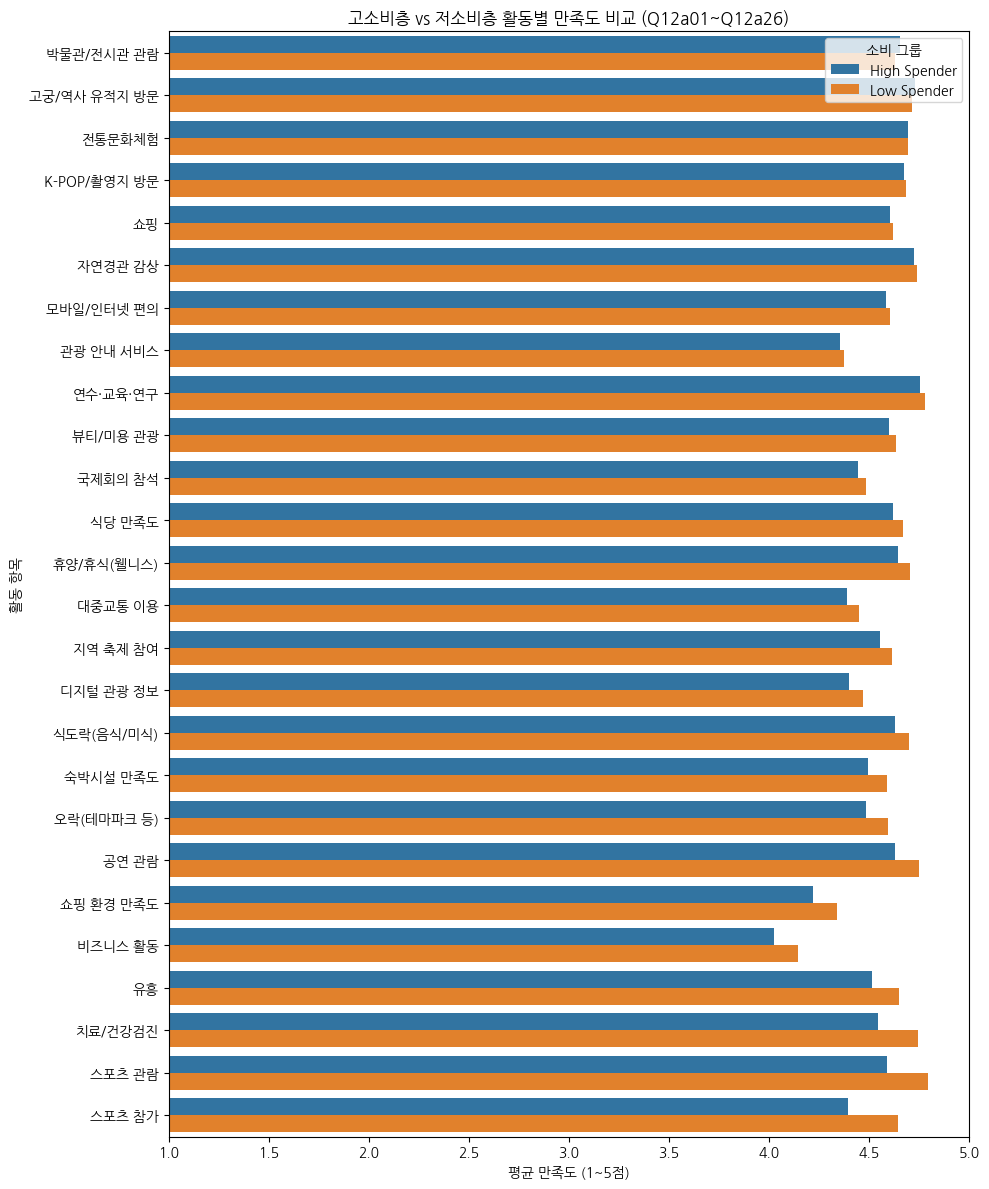

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 매핑 테이블 정의
satisfaction_map = {
    '1': 1, '2': 2, '3': 3, '4': 4, '5': 5,
    '① 매우 불만족': 1, '② 불만족': 2, '③ 보통': 3,
    '④ 만족': 4, '⑤ 매우 만족': 5,
    '1 매우 불만족': 1, '2 불만족': 2, '3 보통': 3,
    '4 만족': 4, '5 매우 만족': 5,
    '매우 불만족': 1, '불만족': 2, '보통': 3, '만족': 4, '매우 만족': 5,
    '': None, '없다': None, '해당없음': None, '9': None, None: None
}

# 2. 컬럼 목록 + 활동명 정의
satisfaction_cols_full = [f'Q12a{str(i).zfill(2)}' for i in range(1, 27)]

satisfaction_labels_full = {
    'Q12a01': '식도락(음식/미식)', 'Q12a02': '쇼핑', 'Q12a03': '자연경관 감상',
    'Q12a04': '휴양/휴식(웰니스)', 'Q12a05': '고궁/역사 유적지 방문', 'Q12a06': '전통문화체험',
    'Q12a07': '박물관/전시관 관람', 'Q12a08': 'K-POP/촬영지 방문', 'Q12a09': '공연 관람',
    'Q12a10': '지역 축제 참여', 'Q12a11': '유흥', 'Q12a12': '오락(테마파크 등)',
    'Q12a13': '뷰티/미용 관광', 'Q12a14': '치료/건강검진', 'Q12a15': '스포츠 관람',
    'Q12a16': '스포츠 참가', 'Q12a17': '국제회의 참석', 'Q12a18': '비즈니스 활동',
    'Q12a19': '연수·교육·연구', 'Q12a20': '대중교통 이용', 'Q12a21': '숙박시설 만족도',
    'Q12a22': '식당 만족도', 'Q12a23': '쇼핑 환경 만족도', 'Q12a24': '관광 안내 서비스',
    'Q12a25': '모바일/인터넷 편의', 'Q12a26': '디지털 관광 정보'
}

# 3. 매핑 함수 (열별 map 사용)
def map_satisfaction(df, cols):
    mapped_df = df[cols].copy()
    for col in cols:
        mapped_df[col] = mapped_df[col].astype(str).str.strip().map(satisfaction_map)
    return mapped_df

# 4. 고소비/저소비층으로부터 만족도 데이터 변환
high_satis_mapped = map_satisfaction(high_spenders, satisfaction_cols_full)
low_satis_mapped = map_satisfaction(low_spenders, satisfaction_cols_full)

# 5. 평균 계산 및 비교 테이블 생성
high_mean = high_satis_mapped.mean()
low_mean = low_satis_mapped.mean()

satisfaction_comparison = pd.DataFrame({
    'High Spender': high_mean,
    'Low Spender': low_mean,
    'Gap': high_mean - low_mean
})

# 6. 활동명 적용 및 정렬
satisfaction_comparison.index = satisfaction_comparison.index.map(satisfaction_labels_full)
satisfaction_comparison = satisfaction_comparison.sort_values('Gap', ascending=False)

# 7. 시각화용 데이터 변환
plot_df = satisfaction_comparison.reset_index().rename(columns={'index': '활동'})
plot_df_melted = plot_df.melt(id_vars='활동', value_vars=['High Spender', 'Low Spender'],
                              var_name='소비 그룹', value_name='만족도')

# 8. 바 그래프 시각화
plt.figure(figsize=(10, 12))
sns.barplot(data=plot_df_melted, y='활동', x='만족도', hue='소비 그룹')
plt.title('고소비층 vs 저소비층 활동별 만족도 비교 (Q12a01~Q12a26)')
plt.xlabel('평균 만족도 (1~5점)')
plt.ylabel('활동 항목')
plt.xlim(1, 5)
plt.legend(title='소비 그룹')
plt.tight_layout()
plt.show()

#### 1-3.  만족도 비교 (Q11: 전반적 만족도)

In [37]:
print("고소비층 전반적 만족도:")
print(high_spenders['Q11'].value_counts(normalize=True))

print("\n저소비층 전반적 만족도:")
print(low_spenders['Q11'].value_counts(normalize=True))

고소비층 전반적 만족도:
Q11
⑤ 매우 만족     0.711132
④ 만족        0.269243
③ 보통        0.012879
① 매우 불만족    0.005520
② 불만족       0.001227
Name: proportion, dtype: float64

저소비층 전반적 만족도:
Q11
⑤ 매우 만족     0.758940
④ 만족        0.223841
③ 보통        0.011921
① 매우 불만족    0.002649
② 불만족       0.002649
Name: proportion, dtype: float64


### 2. 전체 다시 분석

### [1] 재방문의향 (Q13) - 점수화해서 가중 평균 계산

In [40]:
import numpy as np

# 재방문의향 점수 매핑
q13_map = {
    '① 전혀 그렇지 않다': 1,
    '② 별로 그렇지 않다': 2,
    '③ 보통': 3,
    '④ 대체로 그렇다': 4,
    '⑤ 매우 그렇다': 5
}

# 숫자형 컬럼 생성
df_cluster1_2024['Q13_score'] = df_cluster1_2024['Q13'].map(q13_map)

# 가중 평균 계산
weighted_avg_q13 = np.average(
    df_cluster1_2024['Q13_score'].dropna(),
    weights=df_cluster1_2024.loc[df_cluster1_2024['Q13_score'].notna(), 'weight']
)

print(f"가중 평균 재방문의향 (Q13): {round(weighted_avg_q13, 2)}점")

가중 평균 재방문의향 (Q13): 4.47점


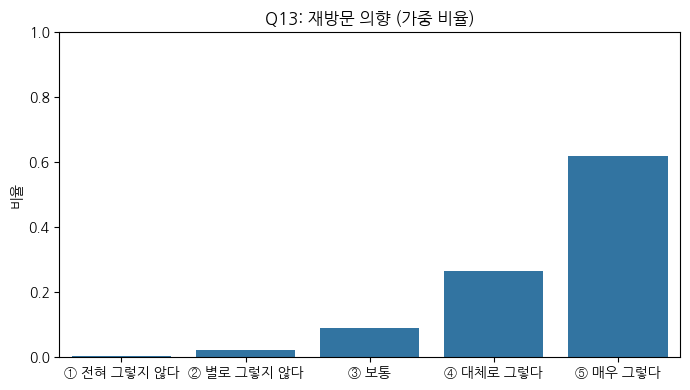

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 재방문의향 라벨 (정해진 순서대로 정렬)
q13_labels = [
    '① 전혀 그렇지 않다', '② 별로 그렇지 않다',
    '③ 보통', '④ 대체로 그렇다', '⑤ 매우 그렇다'
]

# 가중 비율 계산: 조건 만족 응답자의 weight / 전체 weight
q13_weighted_ratio = (
    df_cluster1_2024['Q13']
    .value_counts()
    .reindex(q13_labels)
    .fillna(0)
    .astype(str)
    .to_dict()
)

q13_ratio = {
    k: df_cluster1_2024.loc[df_cluster1_2024['Q13'] == k, 'weight'].sum() / df_cluster1_2024['weight'].sum()
    for k in q13_labels
}

# 시각화
plt.figure(figsize=(7, 4))
sns.barplot(x=list(q13_ratio.keys()), y=list(q13_ratio.values()))
plt.title("Q13: 재방문 의향 (가중 비율)")
plt.ylabel("비율")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

### [2] 주요활동 참여율 (Q8a01~Q8a20) - 값 존재 여부 기반 가중 평균

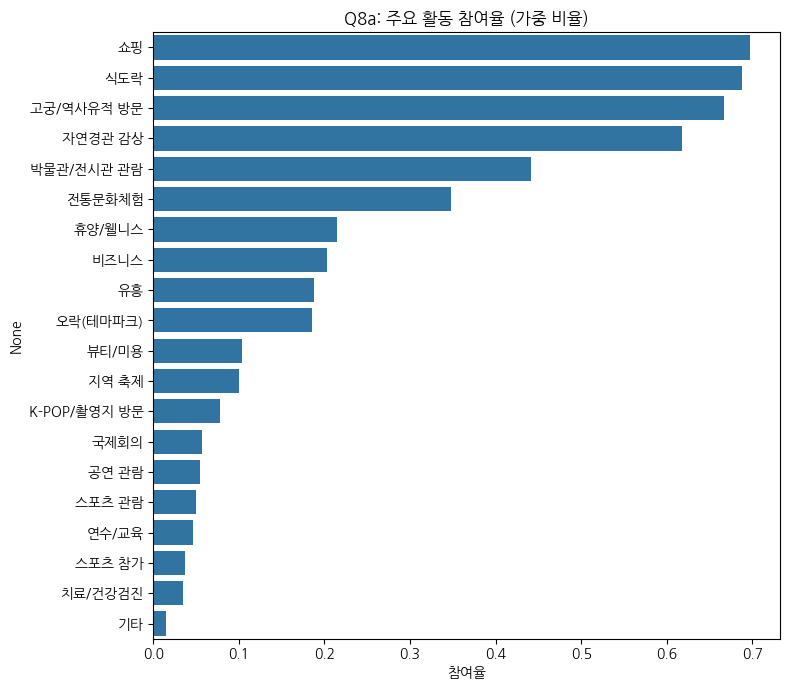

In [46]:
# 주요 활동 항목 (텍스트 라벨 기준)
activity_cols = [col for col in df_cluster1_2024.columns if col.startswith("Q8a")]
activity_labels = [
    "식도락", "쇼핑", "자연경관 감상", "휴양/웰니스", "고궁/역사유적 방문",
    "전통문화체험", "박물관/전시관 관람", "K-POP/촬영지 방문", "공연 관람",
    "지역 축제", "유흥", "오락(테마파크)", "뷰티/미용", "치료/건강검진",
    "스포츠 관람", "스포츠 참가", "국제회의", "비즈니스", "연수/교육", "기타"
]

# notna()로 참여 여부 판단 + 가중 평균
activity_weighted_rate = {
    label: np.average(df_cluster1_2024[col].notna(), weights=df_cluster1_2024['weight'])
    for col, label in zip(activity_cols, activity_labels)
}

activity_df = (
    pd.Series(activity_weighted_rate)
    .sort_values(ascending=False)
    .rename("참여율")
)

# 시각화
plt.figure(figsize=(8, 7))
sns.barplot(x=activity_df.values, y=activity_df.index)
plt.title("Q8a: 주요 활동 참여율 (가중 비율)")
plt.xlabel("참여율")
plt.tight_layout()
plt.show()

### [3] 만족활동 (Q8_1a1 ~ Q8_1a3) - 가중 비율

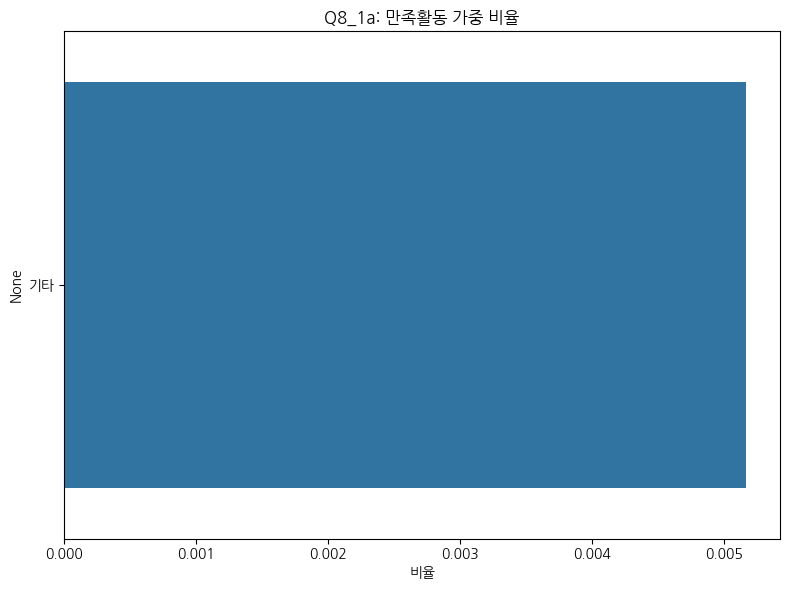

In [47]:
# 만족 활동 코드북 매핑
satisfaction_codebook = {
    '1': "식도락", '2': "쇼핑", '3': "자연경관", '4': "휴양/웰니스",
    '5': "고궁/역사", '6': "전통문화체험", '7': "박물관", '8': "K-POP/촬영지",
    '9': "공연관람", '10': "지역축제", '11': "유흥", '12': "오락",
    '13': "뷰티/미용", '14': "치료/건강검진", '15': "스포츠 관람", '16': "스포츠 참가",
    '17': "국제회의", '18': "비즈니스", '19': "연수·교육", '20': "기타"
}
satisfaction_cols = ['Q8_1a1', 'Q8_1a2', 'Q8_1a3']

# 수동 가중 빈도 합산
from collections import defaultdict
satis_weight_sum = defaultdict(float)

for col in satisfaction_cols:
    for val, w in zip(df_cluster1_2024[col], df_cluster1_2024['weight']):
        if pd.notna(val):
            satis_weight_sum[val] += w

total_weight = sum(satis_weight_sum.values())
satis_ratio = {
    satisfaction_codebook.get(str(k), '기타'): v / total_weight
    for k, v in satis_weight_sum.items()
}

# 시리즈화
satis_series = pd.Series(satis_ratio).sort_values(ascending=False)

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=satis_series.values, y=satis_series.index)
plt.title("Q8_1a: 만족활동 가중 비율")
plt.xlabel("비율")
plt.tight_layout()
plt.show()

### [4] 전반적 만족도 (Q11): 점수화 후 가중 평균

In [48]:
# 점수 매핑
q11_map = {
    '1 매우 불만족': 1, '2 불만족': 2, '3 보통': 3,
    '4 만족': 4, '5 매우 만족': 5,
    '매우 불만족': 1, '불만족': 2, '보통': 3,
    '만족': 4, '매우 만족': 5
}
q11_labels = ['1 매우 불만족', '2 불만족', '3 보통', '4 만족', '5 매우 만족']
df_cluster1_2024['Q11_score'] = df_cluster1_2024['Q11'].map(q11_map)

# 가중 평균
q11_avg = np.average(
    df_cluster1_2024['Q11_score'].dropna(),
    weights=df_cluster1_2024.loc[df_cluster1_2024['Q11_score'].notna(), 'weight']
)

# 가중 비율 분포
q11_dist = {
    k: df_cluster1_2024.loc[df_cluster1_2024['Q11'] == k, 'weight'].sum() / df_cluster1_2024['weight'].sum()
    for k in q11_labels
}

# 시각화
plt.figure(figsize=(7, 4))
sns.barplot(x=list(q11_dist.keys()), y=list(q11_dist.values()))
plt.title(f"Q11: 전반적 만족도 (가중 비율), 평균 {round(q11_avg, 2)}점")
plt.ylabel("비율")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

ZeroDivisionError: Weights sum to zero, can't be normalized